##### [< Forrige](6%20-%20pandas%2C%20filtrering%2C%20logikk%20og%20betingelser.ipynb)     |     [Neste >](8%20-%20git%2C%20pythonfiler%20og%20IDE.ipynb)

<span style="color:#9bb1d4;font-size:30px;font-weight:900"> 7 - løkker og simulering </span>  

Løkker er noe av det mest brukte verktøyet for en programmerer. EN løkke er en programkode som repeteres. Det finnes i hovedsak to typer løkker i Python: `while`-løkker og `for`-løkker. En `while` lar løkken løpe til en betingelse er oppfylt, mens `for` løkken repeterer koden for alle elementene i en liste eller annen *iterativ datastruktur*. 

# For-løkker

Her er eksempel på en `for`-løkke som deriverer alle utrykkene i listen `expressions`:

#### Eksempel 1:

In [1]:
from IPython.display import Markdown, display
import sympy as sp

x,y=sp.symbols("x y")

expressions=[
    sp.root(x,y),
    x**2+5*sp.exp(x),
    x*sp.ln(x)
]

for i in expressions:
    display(Markdown(f"Den deriverte av ${sp.latex(i)}$ er ${sp.latex(sp.diff(i,x))}$"))

Den deriverte av $x^{\frac{1}{y}}$ er $\frac{x^{\frac{1}{y}}}{x y}$

Den deriverte av $x^{2} + 5 e^{x}$ er $2 x + 5 e^{x}$

Den deriverte av $x \log{\left(x \right)}$ er $\log{\left(x \right)} + 1$

Eller du kan bare gjøre en enkel iterasjon for heltall fra en startverdi til en sluttverdi:

#### Eksempel 2:

In [2]:
for i in range(5,8):
    print(i)
    
for i in range(3):
    print(i)

5
6
7
0
1
2


Du kan også "pakke ut" elementer, dersom hvert element i `for`-setningen har et bestemt antall sub-elementer. La oss først lage en liste som inneholder en ´tuple´ med uttrykkene i `expressions` over, og den deriverte av disse:

#### Eksempel 3:

In [3]:
#using list comprehension to generate a list with expression,derivative tuples:
expressions_w_derivatives=[ (i, sp.diff(i,x)) for i in expressions ]
expressions_w_derivatives

[(x**(1/y), x**(1/y)/(x*y)),
 (x**2 + 5*exp(x), 2*x + 5*exp(x)),
 (x*log(x), log(x) + 1)]

Vi kan nå kjøre en for-løkke som forventer at hvert element i listen er en *iterabel* (for eksempel liste eller tuple) med to elementer:

#### Eksempel 4

In [4]:

for function,derivative in expressions_w_derivatives:
    display(Markdown(f"Den deriverte av ${sp.latex(function)}$ er ${sp.latex(derivative)}$"))

Den deriverte av $x^{\frac{1}{y}}$ er $\frac{x^{\frac{1}{y}}}{x y}$

Den deriverte av $x^{2} + 5 e^{x}$ er $2 x + 5 e^{x}$

Den deriverte av $x \log{\left(x \right)}$ er $\log{\left(x \right)} + 1$

# While-løkker

En `while`-løkke er en løkke som fortsetter inntil en betingelse er oppfylt. I eksemplet under ser vi at det genereres nye tilfeldige aksjekurser så lenge kursen er under 125 kroner . 

Aksjen skal bevege seg tilfeldig. For å få til det bruker vi funksjonen `rand` fra `random`-modulen i numpy.  `np.random.rand()` gir et tilfeldig tall mellom null og én, så ved å multiplisere `(np.random.rand()-0.5)` med 40, får vi et tilfeldig tall mellom -20 og 20. 

#### Eksempel 5:

In [5]:
import numpy as np

dy,y=0,100

while y<125:  
    y+=dy
    dy=40*(np.random.rand()-0.5) 
    print(y)

100
83.17201462549355
72.57277598236608
88.81341836098125
81.07372962653665
99.50317231864261
107.2350020047587
93.61537398949304
89.75428373547147
108.38673321216835
111.28374156406079
112.62961849043332
129.30902044928183


Legg spesielt merke til `y+=dy` over. Denne operasjonen legger `dy` til `y`, og tilsvarer altså `y=y+dy`. De aller fleste programmeringsspråk støtter `+=`-operatoren.  

Legg også merke til at vi kan sette flere variabler samtidig, ved å skille både variablene og verdiene med like mange kommaer, `dy,y=0,100`

# Simulering

Løkker kan brukes til mye, så la oss se på et eksempel på simulering. Simulering vil si å trekke tilfeldige tall for å se hvordan en modell opptrer under usikkerhet. La oss for eksempel tenke oss en aksje som starter på hundre kroner, og så beveger seg tilfeldig. Vi ser på aksjen hvert sjette minutt, eller én tidel (0.1) av én time. Tiden øker dermed med 0.1 i hver periode. 

For å tegne opp stien til aksjekursen, lager vi først lister for x- og y-verdiene, og så legger vi til elementer i hver av listene med `append`-funksjonen til listeobjektene, før listen plottes som en graf. Kjør koden flere ganger, for å se ulike simuleringer. 

#### Eksempel 6:

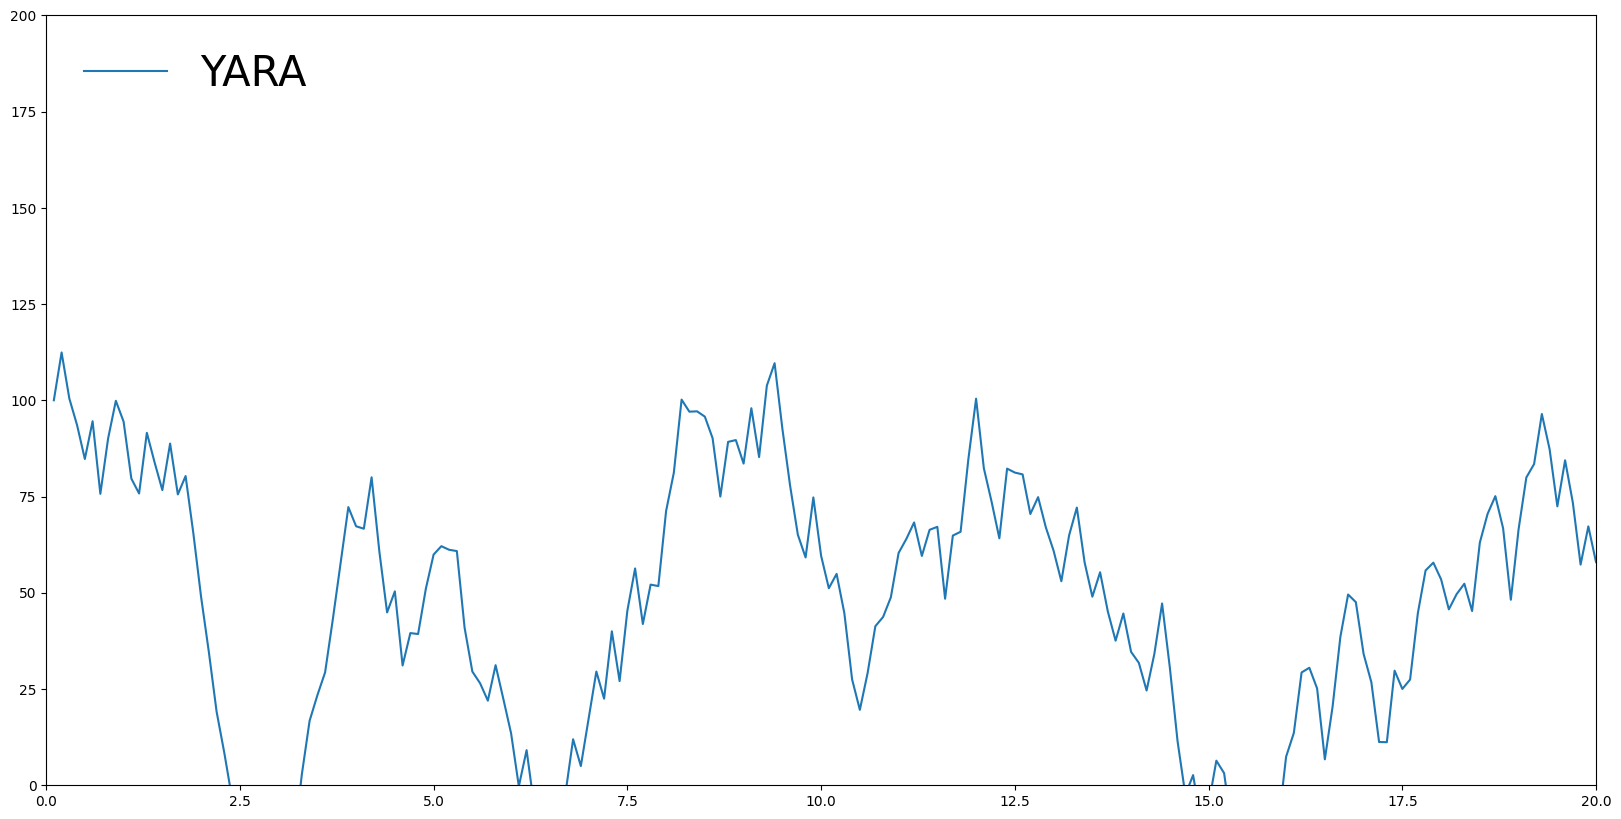

In [31]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from IPython.display import display, clear_output
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_ylim([0,200])
ax.set_xlim([0,20])

x,y,dy=0,100,0

ypath=[]
xpath=[]

while x<25:
    x+= 0.1
    y+= dy
    dy=40*(np.random.rand()-0.5)


    xpath.append(x)
    ypath.append(y)
ax.plot(xpath,ypath,label='YARA')
ax.legend(loc='upper left',frameon=False,fontsize=30)


# Dynamisk plott

Om vi ønsker å formidle kunnskap, er det av og til nyttig med dynamiske plott. Altså plott som endrer seg mens du ser på dem. Vi kan gjøre det ved å rykke inn de to siste setningene i Eksempel 9 over. Det er disse setningene som lager plottet. Ved å rykke dem inn, plottes figuren i hver iterasjon. 

I utgangspunktet vil du da få 25 figurer etter hverandre. For at figuren skal tegnes i samme figur hver gang, må vi slette figuren i figurobjektet `ax` og i visningen (`clear_output(wait = True)`). Vi må da også sette akseintervallene på nytt. 

Det bør nevenes at dette ikke er den anbefalte måte å lage grafiske animasjoner. Det går tregt og hakker. Om en skal gjøre det på en litt mer profesjonell måte, er det hovedsakelig to alternativer:

* bruke python-pakken ´tkinter´, som er den vanligste pakken for å lage python-programmer med grafisk brukergrensesnitt
* javascript på en nettside

#### Eksempel 7:

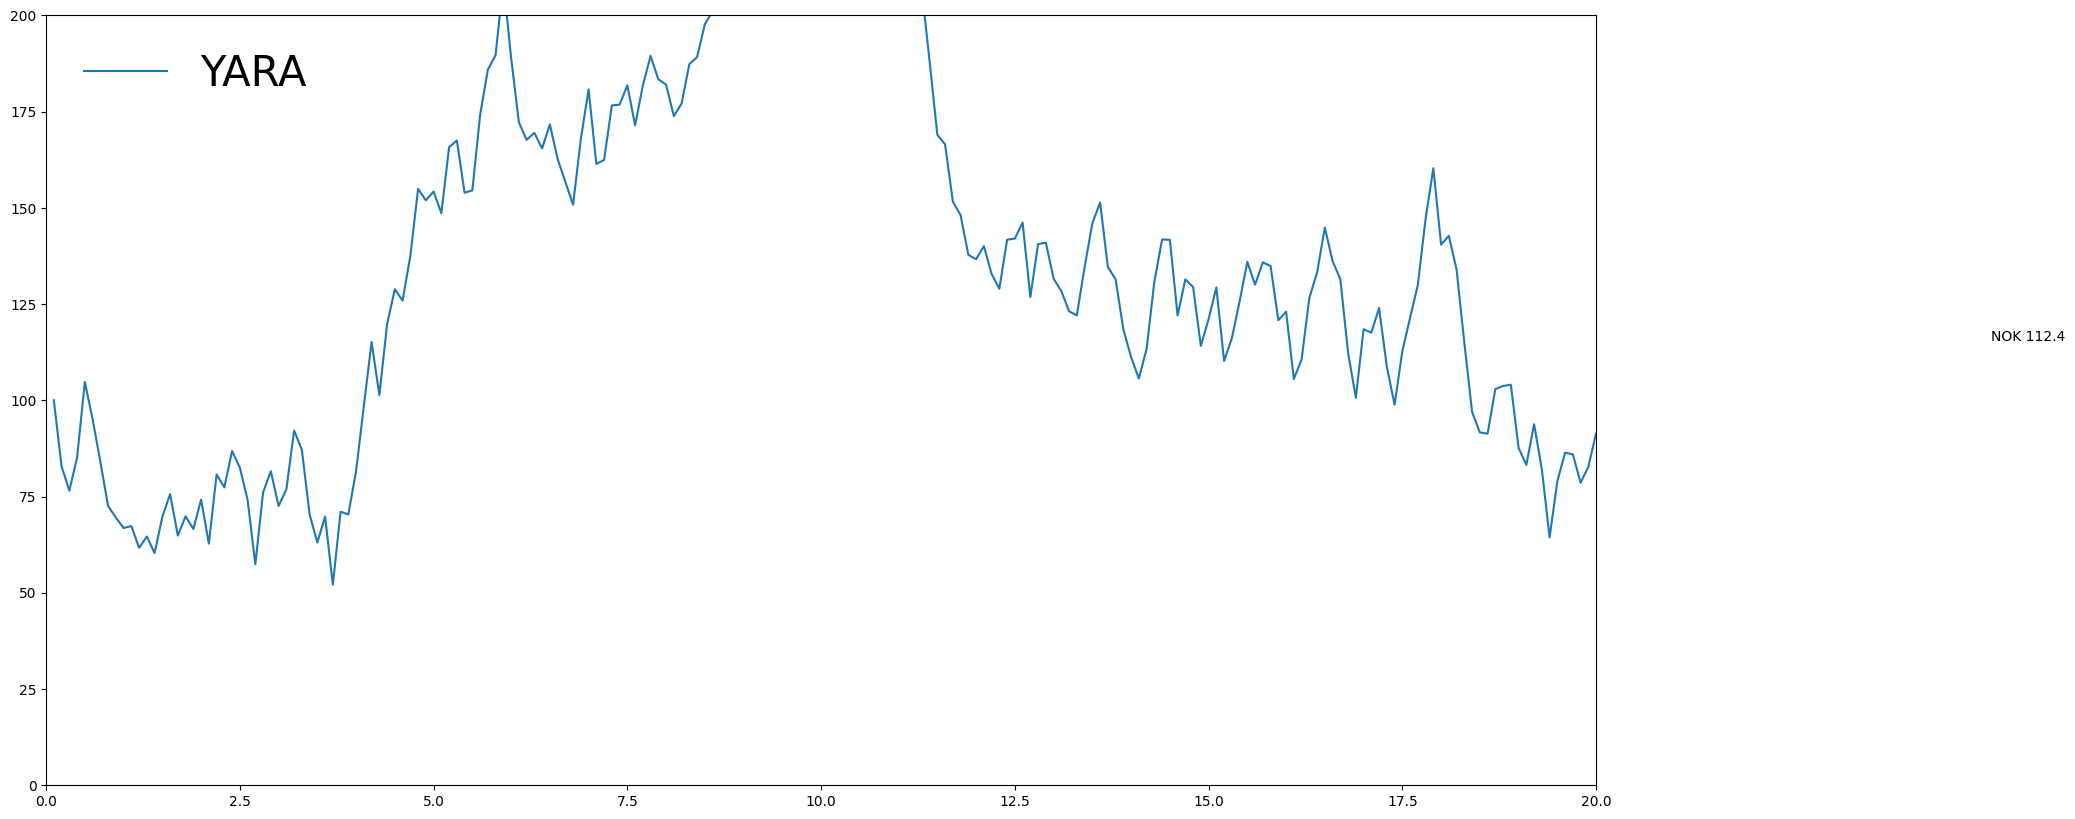

In [34]:
x,y,dy=0,100,0

ypath=[]
xpath=[]

while x<25:
    x+= 0.1
    y+= dy
    dy=40*(np.random.rand()-0.5)


    xpath.append(x)
    ypath.append(y)
    
    #placing the plot function inside the loop, ensures that it is plotted every iteration
    ax.plot(xpath,ypath,label='YARA')
    ax.legend(loc='upper left',frameon=False,fontsize=30)
    
    #making dot:
    c=Ellipse((x, y), 0.25,5, color='r')
    ax.add_patch(c)
    
    #making text:
    ax.text(x+0.1,y+3,f'NOK {np.round(y,1)}')
    
    #jupyter only shows the last statement by default, so we need to add this 
    #in order to plot at every iteration
    display(fig)
    
    #makes sure the plot and output are ereased each time:
    ax.cla()
    ax.set_ylim([0,200])
    ax.set_xlim([0,20])
    clear_output(wait = True)

## Fangenes dilemma - dynamisk repetert spill

"Fangenes dilemma" er et velkjent spill innen samfunnsøkonomi. To fanger avhøres om en forbrytelse de har begått sammen. Hver av dem kan enten velge å sladre på den andre (forråde, "F") eller holde tett (samarbeide, "S") med den andre. Holder begge tett, blir det en lav straff for begge. Slader begge blir det en høyere straff. Dersom bare én sladrer, slipper den som sladrer fri, mens den som holder tett får en streng straff.

Dette kan operasjonaliseres i følgende gevinstfunksjon:


#### Eksempel 8:

In [37]:
def game_payoff(action1, action2):
    if action1 == "S" and action2 == "S":
        return 3, 3
    elif action1 == "S" and action2 == "F":
        return 0, 5
    elif action1 == "F" and action2 == "S":
        return 5, 0
    else:
        return 1, 1

Fangene ønsker selvsagt lavest mulig straff, så lav p

In [38]:
def strategy(previous_action_opponent):
    # For denne enkle simuleringen vil fangen forråde hvis motstanderen forrådet i forrige runde, ellers samarbeide.
    return "F" if previous_action_opponent == "F" else "S"

In [42]:
num_rounds = 10

actions_a = ["S"]
actions_b = ["F"]

scores_a = 0
scores_b = 0

for i in range(1, num_rounds):
    next_a = strategy(actions_b[i-1])
    next_b = strategy(actions_a[i-1])
    
    actions_a.append(next_a)
    actions_b.append(next_b)
    
    score_a, score_b = game_payoff(next_a, next_b)
    scores_a += score_a
    scores_b += score_b


print("Actions A:", actions_a)
print("Actions B:", actions_b)
print("Total Score A:", scores_a)
print("Total Score B:", scores_b)

Actions A: ['S', 'F', 'S', 'F', 'S', 'F', 'S', 'F', 'S', 'F']
Actions B: ['F', 'S', 'F', 'S', 'F', 'S', 'F', 'S', 'F', 'S']
Total Score A: 25
Total Score B: 20


## Nummerisk optimering

In [ ]:
import numpy as np

def demand(p):
    """Returnerer antall enheter solgt gitt en pris p."""
    return 100 - p

def profit(p, C):
    """Beregner profitt gitt pris p og kostnad per enhet C."""
    Q = demand(p)
    return p * Q - C * Q

def find_optimal_price(start, end, step, C):
    """Finner den optimale prisen ved å iterere over et prisspekter."""
    max_profit = float('-inf')
    optimal_price = None
    n_samples = 1000
    for p in np.linspace(start, end + step, n_samples):
        current_profit = profit(p, C)
        if current_profit > max_profit:
            max_profit = current_profit
            optimal_price = p

    return optimal_price, max_profit

# Parametere
C = 5  # kostnad per enhet
start_price = 0
end_price = 100
price_step = 0.1

optimal_price, max_profit = find_optimal_price(start_price, end_price, price_step, C)

print(f"Optimal pris: {optimal_price}")
print(f"Maksimal profitt ved optimal pris: {max_profit}")

## "Monte Carlo"-simulering

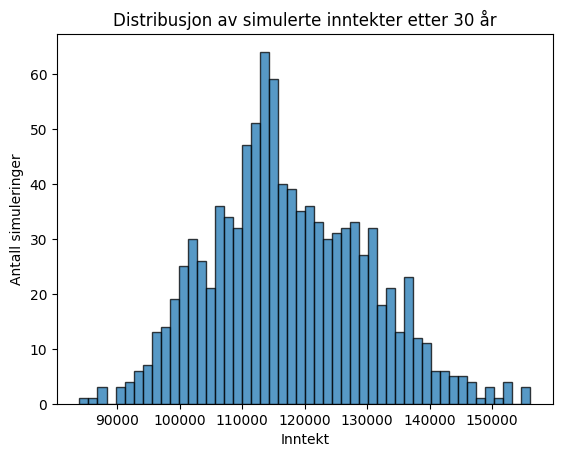

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_income(initial_income, growth_rate, volatility, years, num_simulations):
    """Returnerer en 2D-array med simulerte inntekter for hvert år og hver simulering."""
    all_incomes = []
    for _ in range(num_simulations):
        incomes = [initial_income]
        for _ in range(years-1):
            next_year_income = incomes[-1] + incomes[-1] * (growth_rate + np.random.normal(0, volatility))
            incomes.append(next_year_income)
        all_incomes.append(incomes)
    return np.array(all_incomes)

# Parametere
initial_income = 50000  # startinntekt
growth_rate = 0.03  # forventet årlig inntektsvekst
volatility = 0.02  # årlig usikkerhet i inntektsveksten
years = 30  # antall år
num_simulations = 1000  # antall Monte Carlo-simuleringer

simulated_incomes = simulate_income(initial_income, growth_rate, volatility, years, num_simulations)

# Henter inntektene fra det siste året av hver simulering
final_year_incomes = simulated_incomes[:, -1]

# Plotter stolpediagram for inntektene det siste året
plt.hist(final_year_incomes, bins=50, edgecolor='black', alpha=0.75)
plt.title("Distribusjon av simulerte inntekter etter 30 år")
plt.xlabel("Inntekt")
plt.ylabel("Antall simuleringer")
plt.show()



# Oppgaver

1. Du vil raskt oppdage et problem med koden i Eksempel 9. Aksjekursen kan bli negativ. Dette kan unngås ved å plotte *eksponenenten* av prosessen, i stedet. Dette kan du få til på følgende måte 
    1. Omdøp `y` i `y+= dy` til `lny`, og `x,y,dy=0,100,0` til `x,lny,dy=0,100,0`
    2. Endre startverdien til lny øverst i koden fra 100 til 0.
    3. Eksponenten liker ikke store tall som argument, så fjern `40*` fra definisjonen av `dy` inne i while-løkken.
    4. definer en ny `y`som settes lik hundre ganger eksponenten til `lny`. Bruk `exp()`-funksjonen til numpy. 
    

2. I simuleringen du nå har laget over, lag intervallet for aksjekursen dynamisk, slik at slik at største aksjekurs alltid er minst ti prosent mer enn den simulerte kursen.

3. Forsøk å endre på utgangsstrategiene til spillerne i Eksempel 8 og på selve strategifunksjonen, og se hva som skjer. 

4. Lat et dynamisk spill der du selv definerer fortjenester og strategier

5. Finn optimal pris i Eksempel ?? analytisk der enhetskostnadene er både kjent og ukjent, og sammenlign resultatet med det nummeriske svaret

In [27]:
import sympy as sp
from sympy.solvers import solve
p, C = sp.symbols("p C")

foc = sp.Eq(sp.diff(profit(p,C),p), 0)
solve(foc,p)[0]

C/2 + 50

In [29]:
cost = 5
foc = sp.Eq(sp.diff(profit(p,cost),p), 0)
float(solve(foc,p)[0])

52.5

6. Lag en "Monte Carlo"-simulering der enhetskostnadene er usikre, og plott et stolpediagram for optimal pris

##### [< Forrige](6%20-%20pandas%2C%20filtrering%2C%20logikk%20og%20betingelser.ipynb)    |      <span style="color:lightgrey">Neste></span>